In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import seaborn as sns
import numpy as np

# Read the NetCDF files into xarray.DataArray objects
preci_schwarzwald = xr.open_dataarray('data/P_data_schwarzwald.nc')
preci_moisture_harz = xr.open_dataarray('data/P_data_harz.nc')

# Calculate mean precipitation for each grid cell
mean_preci_grid_schwarzwald = preci_schwarzwald.mean(dim=('lat', 'lon'))
mean_preci_grid_harz = preci_moisture_harz.mean(dim=('lat', 'lon'))

# Calculate the yearly mean precipitation for both regions
yearly_mean_preci_schwarzwald = mean_preci_grid_schwarzwald.groupby('time.year').mean(dim='time')
yearly_mean_preci_harz = mean_preci_grid_harz.groupby('time.year').mean(dim='time')

import pandas as pd


# Reshape the DataArrays into 2D arrays
reshaped_schwarzwald = yearly_mean_preci_schwarzwald.values.reshape(-1, 1)
reshaped_harz = yearly_mean_preci_harz.values.reshape(-1, 1)

# Create DataFrames
df_schwarzwald = pd.DataFrame(reshaped_schwarzwald, columns=['Yearly Mean Precipitation (Schwarzwald)'])
df_harz = pd.DataFrame(reshaped_harz, columns=['Yearly Mean Precipitation (Harz)'])

# Combine DataFrames into one table
table = pd.concat([df_schwarzwald, df_harz], axis=1)

# Calculate the mean over all years for both regions
mean_preci_all_years_schwarzwald = yearly_mean_preci_schwarzwald.mean()
mean_preci_all_years_harz = yearly_mean_preci_harz.mean()

# Display the mean precipitation over all years for both regions
print("Mean precipitation over all years for Schwarzwald:", mean_preci_all_years_schwarzwald.values)
print("Mean precipitation over all years for Harz:", mean_preci_all_years_harz.values)



Mean precipitation over all years for Schwarzwald: 0.003585970719011802
Mean precipitation over all years for Harz: 0.0021181473216945143


In [17]:
0.0021181473216945143 * 1000 * 365

773.1237724184977

KeyboardInterrupt: 

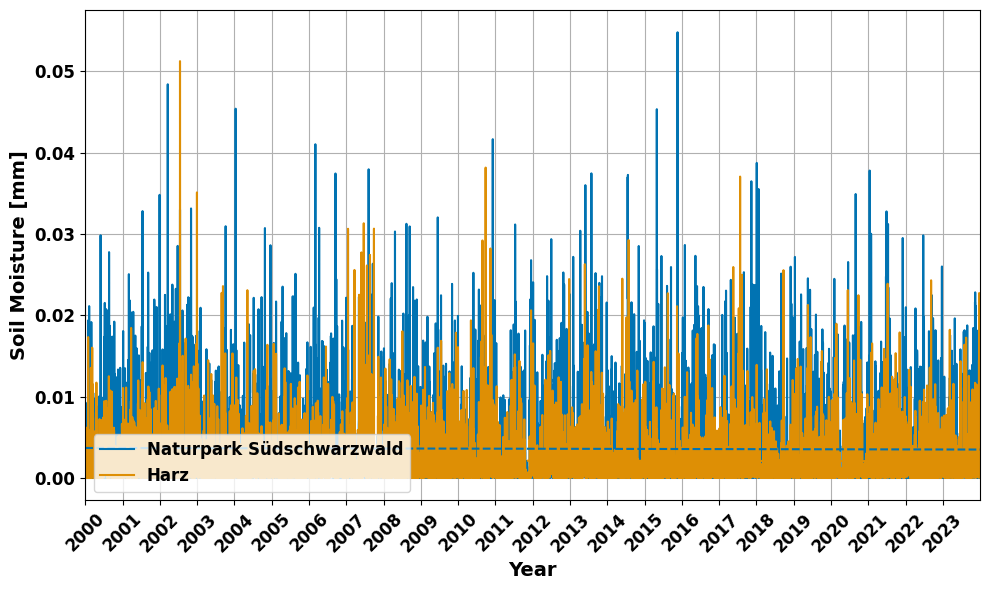

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import seaborn as sns
import numpy as np

# Read the NetCDF files into xarray.DataArray objects
soil_moisture_xr_schwarzwald = xr.open_dataarray('data/soil_moisture_data_schwarzwald.nc')
soil_moisture_xr_harz = xr.open_dataarray('data/soil_moisture_data_harz2.nc')

# Calculate the mean along the lat and lon axes (axis=1) for soil moisture for both regions
mean_soil_moisture_schwarzwald = soil_moisture_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_soil_moisture_harz = soil_moisture_xr_harz.mean(dim=('lat', 'lon'))

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the mean soil moisture for Schwarzwald
plt.figure(figsize=(10, 6))
schwarzwald_color = sns.color_palette()[0]  # First color in the colorblind palette
harz_color = sns.color_palette()[1]  # Second color in the colorblind palette
plt.plot(mean_soil_moisture_schwarzwald.time, mean_soil_moisture_schwarzwald, linestyle='-', color=schwarzwald_color, label='Naturpark Südschwarzwald')
# Plot the mean soil moisture for Harz
plt.plot(mean_soil_moisture_harz.time, mean_soil_moisture_harz, linestyle='-', color=harz_color, label='Harz')

# Calculate trend lines
z_schwarzwald = np.polyfit(mdates.date2num(mean_soil_moisture_schwarzwald.time), mean_soil_moisture_schwarzwald, 1)
p_schwarzwald = np.poly1d(z_schwarzwald)
plt.plot(mean_soil_moisture_schwarzwald.time, p_schwarzwald(mdates.date2num(mean_soil_moisture_schwarzwald.time)), color=schwarzwald_color, linestyle='--')

z_harz = np.polyfit(mdates.date2num(mean_soil_moisture_harz.time), mean_soil_moisture_harz, 1)
p_harz = np.poly1d(z_harz)
plt.plot(mean_soil_moisture_harz.time, p_harz(mdates.date2num(mean_soil_moisture_harz.time)), color=harz_color, linestyle='--')

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Soil Moisture [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_soil_moisture_schwarzwald.time.min(), mean_soil_moisture_schwarzwald.time.max())

# Show every year on the x-axis based on the data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.tight_layout()

# Make the legend text bold and add a frame with a white background
legend = plt.legend(loc='lower left', fontsize=12, frameon=True, facecolor='white')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save the plot as a PDF file in the results folder
plt.savefig('results/soil_moisture_plot.pdf')

plt.show()


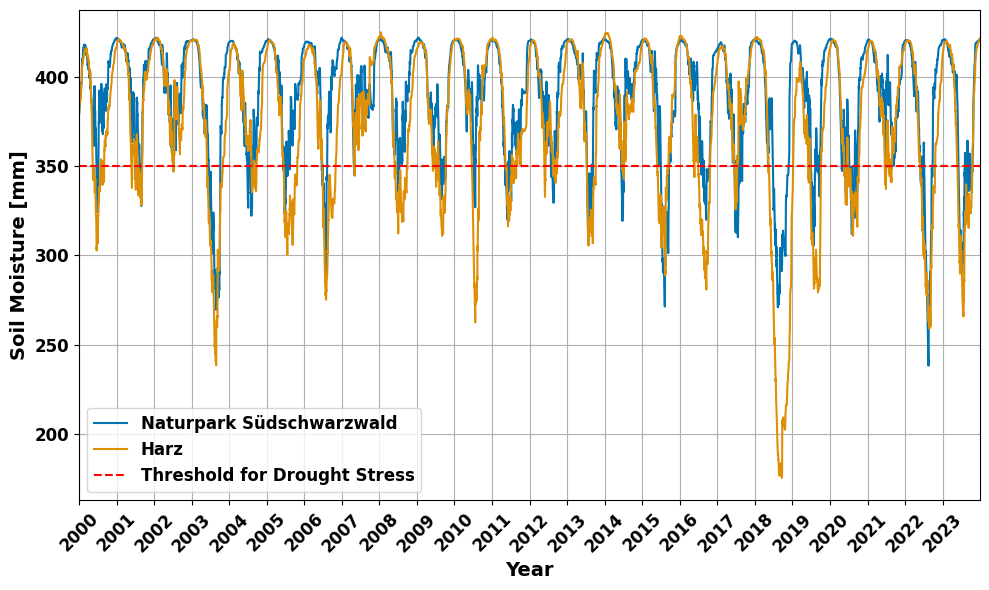

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import seaborn as sns

# Read the NetCDF files into xarray.DataArray objects
soil_moisture_xr_schwarzwald = xr.open_dataarray('data/soil_moisture_data_schwarzwald.nc')
soil_moisture_xr_harz = xr.open_dataarray('data/soil_moisture_data_harz2.nc')

# Calculate the mean along the lat and lon axes (axis=1) for soil moisture for both regions
mean_soil_moisture_schwarzwald = soil_moisture_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_soil_moisture_harz = soil_moisture_xr_harz.mean(dim=('lat', 'lon'))

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the mean soil moisture for Schwarzwald
plt.figure(figsize=(10, 6))
schwarzwald_color = sns.color_palette()[0]  # First color in the colorblind palette
harz_color = sns.color_palette()[1]  # Second color in the colorblind palette
plt.plot(mean_soil_moisture_schwarzwald.time, mean_soil_moisture_schwarzwald, linestyle='-', color=schwarzwald_color, label='Naturpark Südschwarzwald')
# Plot the mean soil moisture for Harz
plt.plot(mean_soil_moisture_harz.time, mean_soil_moisture_harz, linestyle='-', color=harz_color, label='Harz')

# Plot the threshold for drought stress
plt.axhline(y=350, color='red', linestyle='--', label='Threshold for Drought Stress')

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Soil Moisture [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_soil_moisture_schwarzwald.time.min(), mean_soil_moisture_schwarzwald.time.max())

# Show every year on the x-axis based on the data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.tight_layout()

# Make the legend text bold and add a frame with a white background
legend = plt.legend(loc='lower left', fontsize=12, frameon=True, facecolor='white')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save the plot as a PDF file in the results folder
plt.savefig('results/soil_moisture_plot.pdf')

plt.show()


In [120]:
import pandas as pd
import xarray as xr

# Read the NetCDF files into xarray.DataArray objects
soil_moisture_xr_schwarzwald = xr.open_dataarray('data/soil_moisture_data_schwarzwald.nc')
soil_moisture_xr_harz = xr.open_dataarray('data/soil_moisture_data_harz2.nc')

# Calculate the mean along the lat and lon axes (axis=1) for soil moisture for both regions
mean_soil_moisture_schwarzwald = soil_moisture_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_soil_moisture_harz = soil_moisture_xr_harz.mean(dim=('lat', 'lon'))

# Create DataFrames
df_schwarzwald = pd.DataFrame({'Time': mean_soil_moisture_schwarzwald.time, 
                                'Soil Moisture (Schwarzwald)': mean_soil_moisture_schwarzwald.values})
df_harz = pd.DataFrame({'Time': mean_soil_moisture_harz.time, 
                         'Soil Moisture (Harz)': mean_soil_moisture_harz.values})

# Merge the DataFrames on the 'Time' column
df_merged = pd.merge(df_schwarzwald, df_harz, on='Time', how='inner')

# Display the first few rows of the merged DataFrame
print(df_merged.head())


        Time  Soil Moisture (Schwarzwald)  Soil Moisture (Harz)
0 2000-01-01                   378.000000            378.000000
1 2000-01-02                   379.554166            379.317126
2 2000-01-03                   379.743675            379.484632
3 2000-01-04                   379.885727            379.626792
4 2000-01-05                   381.493043            383.070724


In [73]:
# Convert 'Time' column to datetime type if it's not already
df_merged['Time'] = pd.to_datetime(df_merged['Time'])

# Extract year and day of the year
df_merged['Year'] = df_merged['Time'].dt.year
df_merged['Day of Year'] = df_merged['Time'].dt.dayofyear

In [69]:
# Filter out rows with day of the year out of range
df_merged = df_merged[(df_merged['Day of Year'] >= 1) & (df_merged['Day of Year'] <= 365)]


In [75]:
df_merged

,Time,Soil Moisture (Schwarzwald),Soil Moisture (Harz),Year,Day of Year
0,2000-01-01,378.000000,378.000000,2000,1
1,2000-01-02,379.554166,379.317126,2000,2
2,2000-01-03,379.743675,379.484632,2000,3
3,2000-01-04,379.885727,379.626792,2000,4
4,2000-01-05,381.493043,383.070724,2000,5
...,...,...,...,...,...
8761,2023-12-27,420.632937,420.293787,2023,361
8762,2023-12-28,420.954547,420.568377,2023,362
8763,2023-12-29,421.034857,420.932779,2023,363
8764,2023-12-30,421.093083,421.033042,2023,364


In [79]:
import pandas as pd

# Assuming df_merged is your DataFrame containing the data
# Convert 'Time' column to datetime if it's not already in datetime format
df_merged['Time'] = pd.to_datetime(df_merged['Time'])

# Filter the DataFrame to get only entries where 'Day of Year' is 1
df_day1 = df_merged[df_merged['Day of Year'] == 1]

# Calculate the mean of 'Soil Moisture (Schwarzwald)' and 'Soil Moisture (Harz)' columns
mean_soil_moisture_schwarzwald = df_day1['Soil Moisture (Schwarzwald)'].mean()
mean_soil_moisture_harz = df_day1['Soil Moisture (Harz)'].mean()

print("Mean Soil Moisture (Schwarzwald) on Day 1:", mean_soil_moisture_schwarzwald)
print("Mean Soil Moisture (Harz) on Day 1:", mean_soil_moisture_harz)


Mean Soil Moisture (Schwarzwald) on Day 1: 418.3175232395135
Mean Soil Moisture (Harz) on Day 1: 410.8945104188506


In [83]:
import pandas as pd

# Assuming df_merged is your DataFrame containing the data
# Convert 'Time' column to datetime if it's not already in datetime format
df_merged['Time'] = pd.to_datetime(df_merged['Time'])

# Initialize an empty list to store the mean values for each day
mean_values = []

# Loop through each day of the year (from 1 to 365)
for day in range(1, 366):
    # Filter the DataFrame to get only entries for the current day
    df_day = df_merged[df_merged['Day of Year'] == day]
    
    # Calculate the mean of 'Soil Moisture (Schwarzwald)' and 'Soil Moisture (Harz)' columns for the current day
    mean_soil_moisture_schwarzwald = df_day['Soil Moisture (Schwarzwald)'].mean()
    mean_soil_moisture_harz = df_day['Soil Moisture (Harz)'].mean()
    
    # Append the mean values to the list
    mean_values.append({'Day of Year': day,
                        'Mean Soil Moisture (Schwarzwald)': mean_soil_moisture_schwarzwald,
                        'Mean Soil Moisture (Harz)': mean_soil_moisture_harz})

# Create a DataFrame from the list of mean values
mean_soil_moisture_per_day = pd.DataFrame(mean_values)

print(mean_soil_moisture_per_day)


     Day of Year  Mean Soil Moisture (Schwarzwald)  Mean Soil Moisture (Harz)
0              1                        418.317523                 410.894510
1              2                        418.397104                 411.283919
2              3                        418.460826                 411.562186
3              4                        418.495300                 411.786906
4              5                        418.578068                 412.263124
..           ...                               ...                        ...
360          361                        419.785121                 411.238912
361          362                        419.889855                 411.475472
362          363                        419.958101                 411.720899
363          364                        419.973900                 412.094538
364          365                        420.009710                 412.420265

[365 rows x 3 columns]


In [84]:
merged_df = pd.merge(df_merged, mean_soil_moisture_per_day, on='Day of Year', how='left')

In [91]:
# Calculate the difference for Schwarzwald
merged_df['Anomalies_Schwarzwald'] = merged_df['Soil Moisture (Schwarzwald)'] - merged_df['Mean Soil Moisture (Schwarzwald)']

# Calculate the difference for Harz
merged_df['Anomalies_Harz'] = merged_df['Soil Moisture (Harz)'] - merged_df['Mean Soil Moisture (Harz)']

           Time  Soil Moisture (Schwarzwald)  Soil Moisture (Harz)  Year  \
0    2000-01-01                   378.000000            378.000000  2000   
1    2000-01-02                   379.554166            379.317126  2000   
2    2000-01-03                   379.743675            379.484632  2000   
3    2000-01-04                   379.885727            379.626792  2000   
4    2000-01-05                   381.493043            383.070724  2000   
...         ...                          ...                   ...   ...   
8761 2023-12-27                   420.632937            420.293787  2023   
8762 2023-12-28                   420.954547            420.568377  2023   
8763 2023-12-29                   421.034857            420.932779  2023   
8764 2023-12-30                   421.093083            421.033042  2023   
8765 2023-12-31                   421.270961            421.397922  2023   

      Day of Year  Mean Soil Moisture (Schwarzwald)  \
0               1               

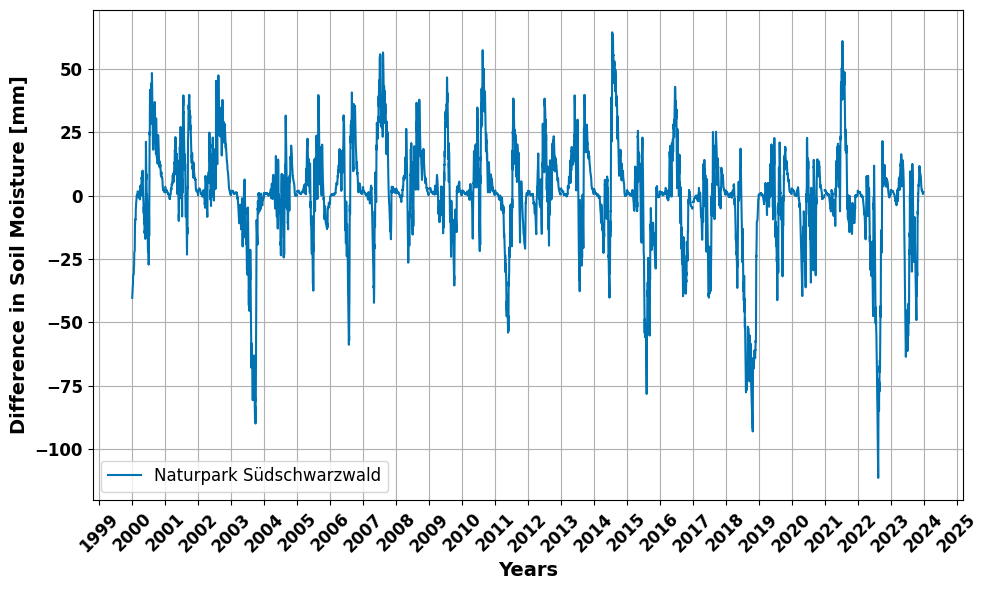

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the anomalies for Schwarzwald
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Time'], merged_df['Anomalies_Schwarzwald'], label='Anomalies (Schwarzwald)', linestyle='-', color=sns.color_palette()[0])

# Add labels and title
plt.xlabel('Years', fontsize=14, fontweight='bold')
plt.ylabel('Difference in Soil Moisture [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Show every year on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Add gridlines
plt.grid(True)

# Add legend with custom label and bold text
plt.legend(['Naturpark Südschwarzwald'], fontsize=12, loc='lower left')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Tight layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('results/anomalies_schwarzwald_plot.pdf')

# Show the plot
plt.show()


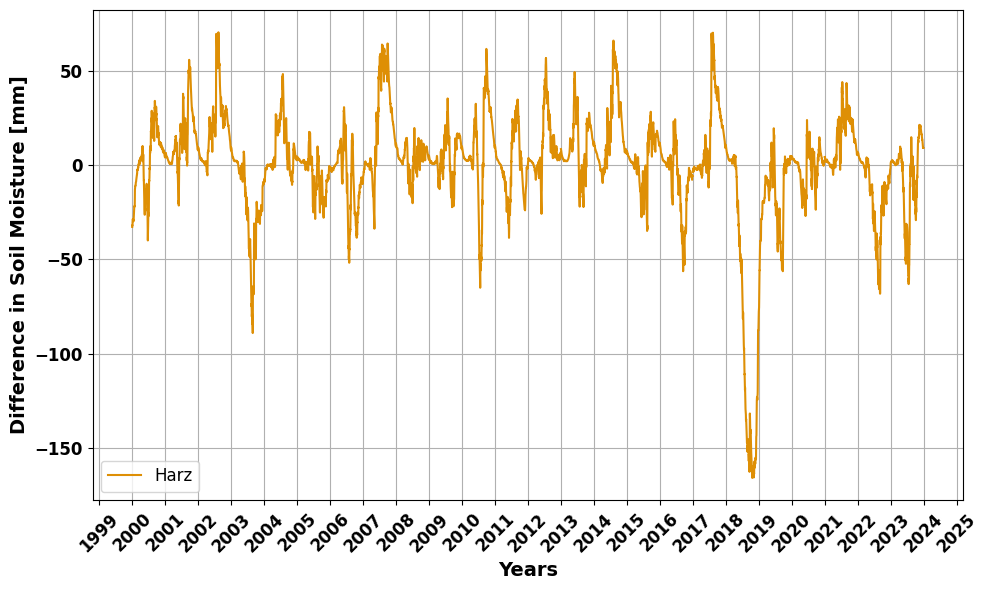

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the anomalies for Harz
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Time'], merged_df['Anomalies_Harz'], label='Anomalies (Harz)', linestyle='-', color=sns.color_palette()[1])

# Add labels and title
plt.xlabel('Years', fontsize=14, fontweight='bold')
plt.ylabel('Difference in Soil Moisture [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Show every year on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Add gridlines
plt.grid(True)

# Add legend with custom label and bold text
plt.legend(['Harz'], fontsize=12, loc='lower left')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Tight layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('results/anomalies_harz_plot.pdf')

# Show the plot
plt.show()


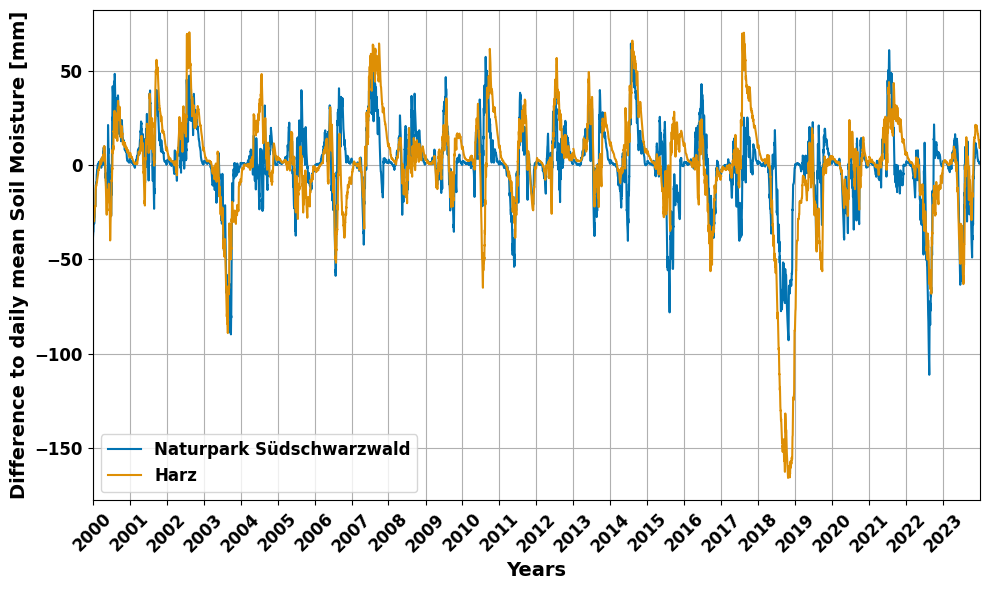

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the anomalies for Schwarzwald
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Time'], merged_df['Anomalies_Schwarzwald'], label='Anomalies (Schwarzwald)', linestyle='-', color=sns.color_palette()[0])

# Plot the anomalies for Harz
plt.plot(merged_df['Time'], merged_df['Anomalies_Harz'], label='Anomalies (Harz)', linestyle='-', color=sns.color_palette()[1])

# Add labels and title
plt.xlabel('Years', fontsize=14, fontweight='bold')
plt.ylabel('Difference to daily mean Soil Moisture [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_soil_moisture_schwarzwald.time.min(), mean_soil_moisture_schwarzwald.time.max())

# Show every year on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Add gridlines
plt.grid(True)

# Add legend with custom labels and bold text
legend = plt.legend(['Naturpark Südschwarzwald', 'Harz'], fontsize=12, loc='lower left')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Tight layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('results/anomalies_plot.pdf')

# Show the plot
plt.show()


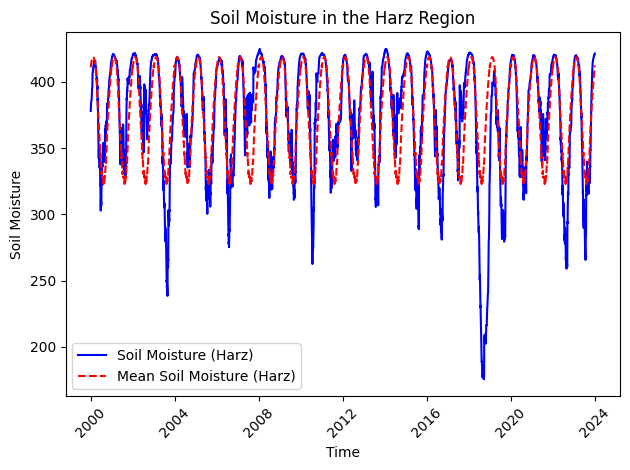

In [88]:
import matplotlib.pyplot as plt

# Filter the merged DataFrame for the Harz region
harz_df = merged_df[['Time', 'Soil Moisture (Harz)', 'Mean Soil Moisture (Harz)']]

# Plot soil moisture data for Harz
plt.plot(harz_df['Time'], harz_df['Soil Moisture (Harz)'], label='Soil Moisture (Harz)', color='blue')

# Plot mean soil moisture as a reference
plt.plot(harz_df['Time'], harz_df['Mean Soil Moisture (Harz)'], label='Mean Soil Moisture (Harz)', linestyle='--', color='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.title('Soil Moisture in the Harz Region')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [121]:
import pandas as pd
import xarray as xr

# Read the NetCDF files into xarray.DataArray objects
soil_moisture_xr_schwarzwald = xr.open_dataarray('data/soil_moisture_data_schwarzwald.nc')
soil_moisture_xr_harz = xr.open_dataarray('data/soil_moisture_data_harz2.nc')

# Calculate the mean along the lat and lon axes (axis=1) for soil moisture for both regions
mean_soil_moisture_schwarzwald = soil_moisture_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_soil_moisture_harz = soil_moisture_xr_harz.mean(dim=('lat', 'lon'))

# Create DataFrames
df_schwarzwald = pd.DataFrame({'Time': mean_soil_moisture_schwarzwald.time, 
                                'Soil Moisture (Schwarzwald)': mean_soil_moisture_schwarzwald.values})
df_harz = pd.DataFrame({'Time': mean_soil_moisture_harz.time, 
                         'Soil Moisture (Harz)': mean_soil_moisture_harz.values})

# Merge the DataFrames on the 'Time' column
df_merged = pd.merge(df_schwarzwald, df_harz, on='Time', how='inner')

# Display the first few rows of the merged DataFrame
print(df_merged.head())


        Time  Soil Moisture (Schwarzwald)  Soil Moisture (Harz)
0 2000-01-01                   378.000000            378.000000
1 2000-01-02                   379.554166            379.317126
2 2000-01-03                   379.743675            379.484632
3 2000-01-04                   379.885727            379.626792
4 2000-01-05                   381.493043            383.070724


In [126]:
import netCDF4 as nc
import numpy as np

data = "data/model_output_soil_moisture.nc"

# Open the NetCDF file
nc_file = nc.Dataset(data)

# Extract variables
time = nc_file.variables['time'][:]
soil_moisture = nc_file.variables['soil_moisture'][:]

# Calculate the mean soil moisture
mean_soil_moisture = np.mean(soil_moisture)

# Close the NetCDF file
nc_file.close()

# Display the mean soil moisture
print("Mean Soil Moisture:", mean_soil_moisture)


Mean Soil Moisture: 370.48071357746244


### Drought Stress Time Series

In [6]:
import pandas as pd
import xarray as xr

# Read the NetCDF files into xarray.DataArray objects
soil_moisture_xr_schwarzwald = xr.open_dataarray('data/soil_moisture_data_schwarzwald.nc')
soil_moisture_xr_harz = xr.open_dataarray('data/soil_moisture_data_harz2.nc')

# Calculate the mean along the lat and lon axes (axis=1) for soil moisture for both regions
mean_soil_moisture_schwarzwald = soil_moisture_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_soil_moisture_harz = soil_moisture_xr_harz.mean(dim=('lat', 'lon'))

# Create DataFrames
df_schwarzwald = pd.DataFrame({'Time': mean_soil_moisture_schwarzwald.time, 
                                'Soil Moisture (Schwarzwald)': mean_soil_moisture_schwarzwald.values})
df_harz = pd.DataFrame({'Time': mean_soil_moisture_harz.time, 
                         'Soil Moisture (Harz)': mean_soil_moisture_harz.values})

# Merge the DataFrames on the 'Time' column
df_merged = pd.merge(df_schwarzwald, df_harz, on='Time', how='inner')

# Calculate the difference from the threshold value of 350 separately for Schwarzwald and Harz
df_merged['Difference Schwarzwald'] = 350 - df_merged['Soil Moisture (Schwarzwald)']
df_merged['Difference Harz'] = 350 - df_merged['Soil Moisture (Harz)']

# Display the first few rows of the merged DataFrame
print(df_merged.head())


        Time  Soil Moisture (Schwarzwald)  Soil Moisture (Harz)  \
0 2000-01-01                   378.000000            378.000000   
1 2000-01-02                   379.554166            379.317126   
2 2000-01-03                   379.743675            379.484632   
3 2000-01-04                   379.885727            379.626792   
4 2000-01-05                   381.493043            383.070724   

   Difference Schwarzwald  Difference Harz  
0              -28.000000       -28.000000  
1              -29.554166       -29.317126  
2              -29.743675       -29.484632  
3              -29.885727       -29.626792  
4              -31.493043       -33.070724  


In [7]:
# Create new columns to accumulate positive values
df_merged['Accumulated Positive Schwarzwald'] = 0
df_merged['Accumulated Positive Harz'] = 0

# Initialize variables to hold the accumulated positive values
accumulated_positive_schwarzwald = 0
accumulated_positive_harz = 0

# Loop through each row to accumulate positive values and reduce when negative
for index, row in df_merged.iterrows():
    # Accumulate positive values for Schwarzwald
    if row['Difference Schwarzwald'] > 0:
        accumulated_positive_schwarzwald += row['Difference Schwarzwald']
    else:
        accumulated_positive_schwarzwald = max(0, accumulated_positive_schwarzwald + row['Difference Schwarzwald'])
    df_merged.at[index, 'Accumulated Positive Schwarzwald'] = accumulated_positive_schwarzwald
    
    # Accumulate positive values for Harz
    if row['Difference Harz'] > 0:
        accumulated_positive_harz += row['Difference Harz']
    else:
        accumulated_positive_harz = max(0, accumulated_positive_harz + row['Difference Harz'])
    df_merged.at[index, 'Accumulated Positive Harz'] = accumulated_positive_harz

# Display the first few rows of the merged DataFrame
print(df_merged.head())

/var/folders/ky/202vw8vj6yv23nntm6j0f2lc0000gn/T/ipykernel_888/2332921673.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3239343206284957' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_merged.at[index, 'Accumulated Positive Harz'] = accumulated_positive_harz
/var/folders/ky/202vw8vj6yv23nntm6j0f2lc0000gn/T/ipykernel_888/2332921673.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.045649792779045' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_merged.at[index, 'Accumulated Positive Schwarzwald'] = accumulated_positive_schwarzwald


        Time  Soil Moisture (Schwarzwald)  Soil Moisture (Harz)  \
0 2000-01-01                   378.000000            378.000000   
1 2000-01-02                   379.554166            379.317126   
2 2000-01-03                   379.743675            379.484632   
3 2000-01-04                   379.885727            379.626792   
4 2000-01-05                   381.493043            383.070724   

   Difference Schwarzwald  Difference Harz  Accumulated Positive Schwarzwald  \
0              -28.000000       -28.000000                               0.0   
1              -29.554166       -29.317126                               0.0   
2              -29.743675       -29.484632                               0.0   
3              -29.885727       -29.626792                               0.0   
4              -31.493043       -33.070724                               0.0   

   Accumulated Positive Harz  
0                        0.0  
1                        0.0  
2                      

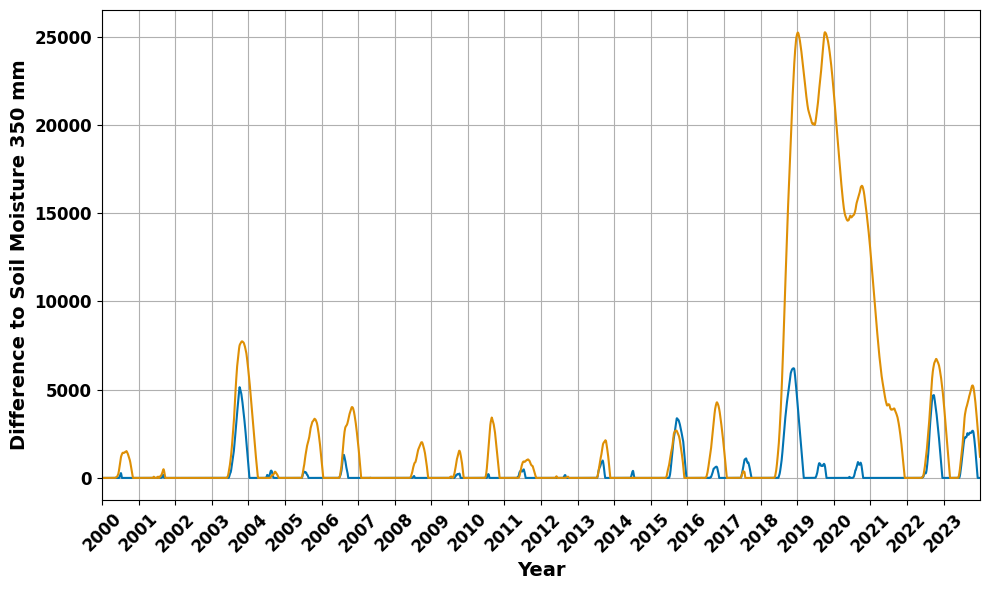

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the accumulated positive values for Schwarzwald
plt.figure(figsize=(10, 6))
plt.plot(df_merged['Time'], df_merged['Accumulated Positive Schwarzwald'], label='Naturpark Südschwarzwald', linestyle='-', color=sns.color_palette()[0])

# Plot the accumulated positive values for Harz
plt.plot(df_merged['Time'], df_merged['Accumulated Positive Harz'], label='Harz', linestyle='-', color=sns.color_palette()[1])

# Add labels and title
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Difference to Soil Moisture 350 mm', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_soil_moisture_schwarzwald.time.min(), mean_soil_moisture_schwarzwald.time.max())

# Show every year on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Add gridlines
plt.grid(True)

# Add legend with custom labels and bold text
#legend = plt.legend(fontsize=12, loc='upper left')
#for text in legend.get_texts():
   # text.set_fontweight('bold')

# Add header

# Tight layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('results/drought_stress.pdf')

# Show the plot
plt.show()


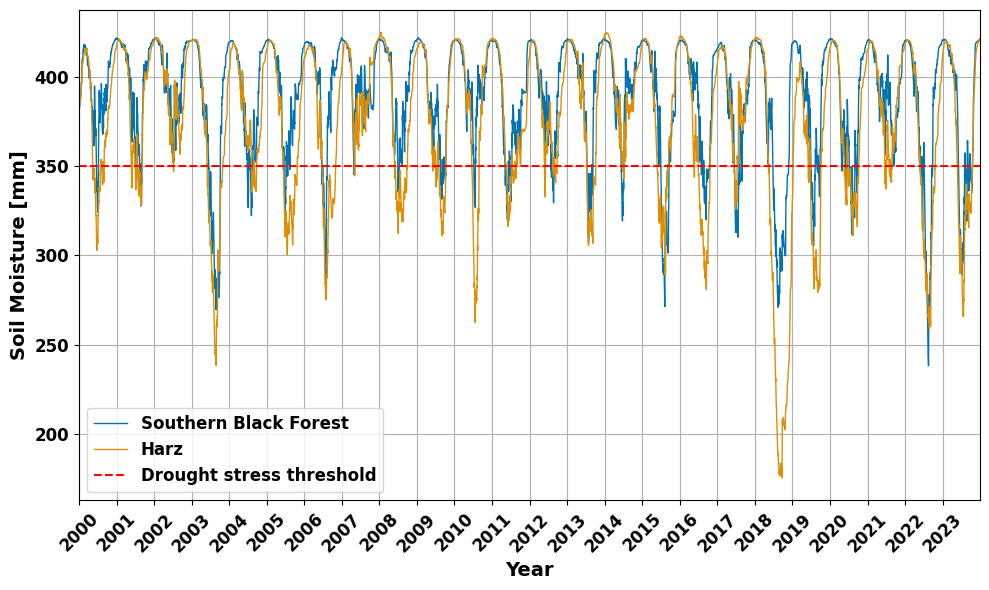

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import seaborn as sns

# Read the NetCDF files into xarray.DataArray objects
soil_moisture_xr_schwarzwald = xr.open_dataarray('data/soil_moisture_data_schwarzwald.nc')
soil_moisture_xr_harz = xr.open_dataarray('data/soil_moisture_data_harz2.nc')

# Calculate the mean along the lat and lon axes (axis=1) for soil moisture for both regions
mean_soil_moisture_schwarzwald = soil_moisture_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_soil_moisture_harz = soil_moisture_xr_harz.mean(dim=('lat', 'lon'))

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the mean soil moisture for Schwarzwald
plt.figure(figsize=(10, 6))
schwarzwald_color = sns.color_palette()[0]  # First color in the colorblind palette
harz_color = sns.color_palette()[1]  # Second color in the colorblind palette
plt.plot(mean_soil_moisture_schwarzwald.time, mean_soil_moisture_schwarzwald, linestyle='-', color=schwarzwald_color, label='Southern Black Forest', linewidth=1)  # Adjust linewidth here
# Plot the mean soil moisture for Harz
plt.plot(mean_soil_moisture_harz.time, mean_soil_moisture_harz, linestyle='-', color=harz_color, label='Harz', linewidth=1)  # Adjust linewidth here

# Plot the threshold for drought stress
plt.axhline(y=350, color='red', linestyle='--', label='Drought stress threshold')

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Soil Moisture [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_soil_moisture_schwarzwald.time.min(), mean_soil_moisture_schwarzwald.time.max())

# Show every year on the x-axis based on the data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.tight_layout()

# Make the legend text bold and add a frame with a white background
legend = plt.legend(loc='lower left', fontsize=12, frameon=True, facecolor='white')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save the plot as a PDF file in the results folder
plt.savefig('results/soil_moisture_plot.pdf')

plt.show()


###  Evopotranspiration

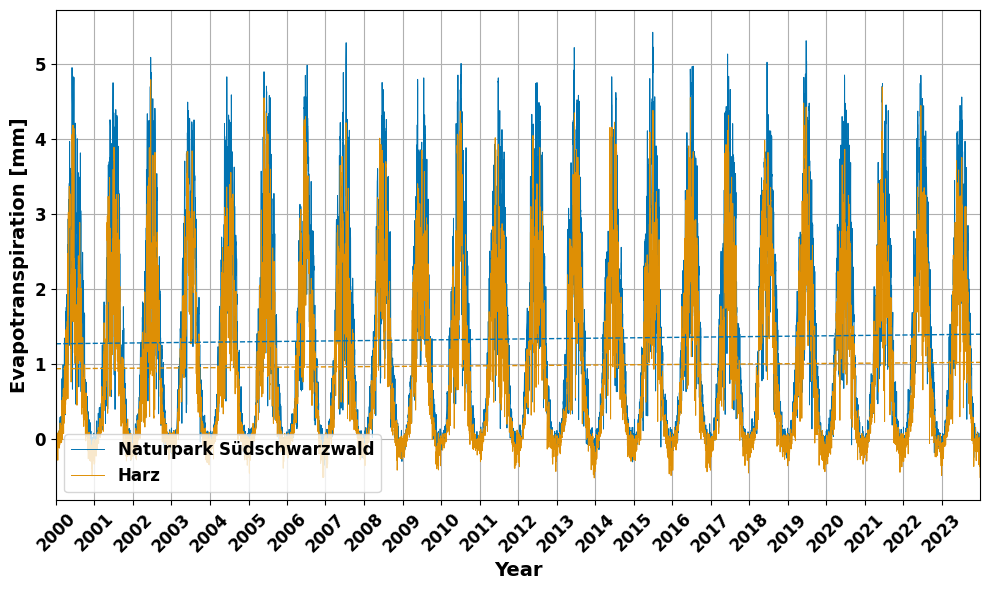

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import seaborn as sns
import numpy as np

# Read the NetCDF files into xarray.DataArray objects
evapotranspiration_xr_schwarzwald = xr.open_dataarray('data/evapotranspiration_data_schwarzwald.nc')
evapotranspiration_xr_harz = xr.open_dataarray('data/evapotranspiration_data_harz.nc')

# Calculate the mean along the lat and lon axes (axis=1) for evapotranspiration for both regions
mean_evapotranspiration_schwarzwald = evapotranspiration_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_evapotranspiration_harz = evapotranspiration_xr_harz.mean(dim=('lat', 'lon'))

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the mean evapotranspiration for Schwarzwald
plt.figure(figsize=(10, 6))
schwarzwald_color = sns.color_palette()[0]  # First color in the colorblind palette
harz_color = sns.color_palette()[1]  # Second color in the colorblind palette
plt.plot(mean_evapotranspiration_schwarzwald.time, mean_evapotranspiration_schwarzwald, linestyle='-', color=schwarzwald_color, label='Naturpark Südschwarzwald', linewidth=0.7)
# Plot the mean evapotranspiration for Harz
plt.plot(mean_evapotranspiration_harz.time, mean_evapotranspiration_harz, linestyle='-', color=harz_color, label='Harz', linewidth=0.7)

# Calculate trend lines
z_schwarzwald = np.polyfit(mdates.date2num(mean_evapotranspiration_schwarzwald.time), mean_evapotranspiration_schwarzwald, 1)
p_schwarzwald = np.poly1d(z_schwarzwald)
plt.plot(mean_evapotranspiration_schwarzwald.time, p_schwarzwald(mdates.date2num(mean_evapotranspiration_schwarzwald.time)), color=schwarzwald_color, linestyle='--', linewidth=1)
z_harz = np.polyfit(mdates.date2num(mean_evapotranspiration_harz.time), mean_evapotranspiration_harz, 1)
p_harz = np.poly1d(z_harz)
plt.plot(mean_evapotranspiration_harz.time, p_harz(mdates.date2num(mean_evapotranspiration_harz.time)), color=harz_color, linestyle='--', linewidth=1)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Evapotranspiration [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_evapotranspiration_schwarzwald.time.min(), mean_evapotranspiration_schwarzwald.time.max())

# Show every year on the x-axis based on the data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.tight_layout()

# Make the legend text bold and add a frame with a white background
legend = plt.legend(loc='lower left', fontsize=12, frameon=True, facecolor='white')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save the plot as a PDF file in the results folder
plt.savefig('results/evapotranspiration_plot.pdf')

plt.show()


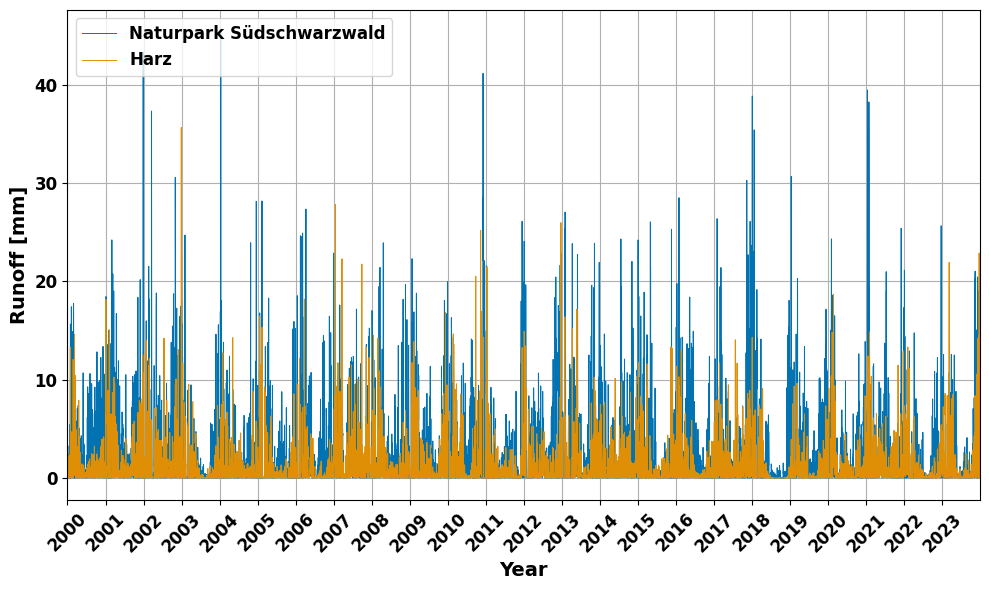

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import seaborn as sns

# Read the NetCDF files into xarray.DataArray objects
runoff_xr_schwarzwald = xr.open_dataarray('data/runoff_data_schwarzwald.nc')
runoff_xr_harz = xr.open_dataarray('data/runoff_data_harz.nc')

# Calculate the mean along the lat and lon axes (axis=1) for runoff for both regions
mean_runoff_schwarzwald = runoff_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_runoff_harz = runoff_xr_harz.mean(dim=('lat', 'lon'))

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the mean runoff for Schwarzwald
plt.figure(figsize=(10, 6))
schwarzwald_color = sns.color_palette()[0]  # First color in the colorblind palette
harz_color = sns.color_palette()[1]  # Second color in the colorblind palette
plt.plot(mean_runoff_schwarzwald.time, mean_runoff_schwarzwald, linestyle='-', color=schwarzwald_color, label='Naturpark Südschwarzwald', linewidth=0.7)
# Plot the mean runoff for Harz
plt.plot(mean_runoff_harz.time, mean_runoff_harz, linestyle='-', color=harz_color, label='Harz', linewidth=0.7)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Runoff [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_runoff_schwarzwald.time.min(), mean_runoff_schwarzwald.time.max())

# Show every year on the x-axis based on the data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.tight_layout()

# Make the legend text bold and add a frame with a white background
legend = plt.legend(loc='upper left', fontsize=12, frameon=True, facecolor='white')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save the plot as a PDF file in the results folder
plt.savefig('results/runoff_plot.pdf')

plt.show()
